In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Business Analyst Workflow with Vertex AI Extensions

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_extensions%2Fbusiness_analyst_workflow_vertexai_extensions.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/vertex_ai_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/tree/main/genai-on-vertex-ai/vertex_ai_extensions/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | [Lei Pan](https://github.com/genaimagician)|
| Reviewers(s) | [Meltem Subasioglu](https://github.com/5Y5TEM)|
| Last updated | 2024-04-15: Initial Publication |

## Overview

In this notebook, we will show you how to use the Vertex AI Extensions Code Interpreter and Vertex AI Search extensions to complete a housing investment opportunities research report for business stakeholders. You will perform the following steps:

- Creating a pre-built Code Interpreter extension in your project
- Using Code Interpreter to analyze housing data
- Creating and using the Vertex AI Search extension to research on housing investment opportunities
- Automatically adding back the data analysis and research to your Google Slide deck with the [Google Sheets API](https://developers.google.com/sheets/api/guides/concepts) and [Google Slides API](https://developers.google.com/slides/api/reference/rest)
- Emailing the Slides deck link to stakeholders with the [Gmail API](https://developers.google.com/gmail/api/guides)

▶ If you're already familiar with Google Cloud and the Vertex AI Extensions Code Interpreter Extension, you can skip reading between here and the "**Getting Started**" section.

### Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

### Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment. It lets you generate and execute Python code to:

* Analyze, clean, transform, and reshape your datasets
* Visualize data in charts and graphs
* Execute calculations

### Vertex AI Extensions Search Extension

The Vertex AI [Search](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions#vertex_ai_search_extension) extension lets you access and search website corpuses and unstructured data to provide relevant responses to natural language questions, such as:

* "How did the competitive threats for the company change from Q1 of last year to Q1 of this year?"
* "What parts of the company are growing the fastest? How fast?"

### Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library--try pipping the library name of any imports that fail. You'll also notice some comments in code cells that look like "@something"; these have special rendering in colab, but you aren't missing out on any content or important functionality.

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* Google Cloud Storage Client
* Google Slides API
* Google Sheets API
* Gmail API

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.4.7

### Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this, but you still may need to rerun cells that generate working code that doesn't perfectly follow the instructions in the prompt.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter defaults to Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.



## Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com).
1. [Enable the Slide API](https://console.cloud.google.com/flows/enableapi?apiid=slides.googleapis.com).
1. [Enable the Sheet API](https://console.cloud.google.com/flows/enableapi?apiid=sheets.googleapis.com).
1. [Enable the Gmail API](https://console.cloud.google.com/flows/enableapi?apiid=gmail.googleapis.com).
1. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com)
1. [Enable the Agent Builder API](https://console.cloud.google.com/gen-app-builder/start)

## Google Cloud Permissions

**To run the complete Notebook, including the optional section, you will need to have Owner permisions to the project.**

If you want to skip the optional section, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access):
* **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
* **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
* **`roles/discoveryengine.admin`** to modify discoveryengine assets
* **`roles/aiplatform.user`** to use AI Platform components
* **`roles/storage.objectAdmin`** to modify and delete GCS buckets





### Install Vertex AI SDK and other required packages


In [ ]:
!pip install google-cloud-discoveryengine --upgrade
!pip install google-cloud-aiplatform --upgrade
# Note -- this may not work in some non-Colab environments. If you get errors
# when running 'import vertexai' below, you'll need to find another way to
# install the latest google-cloud-aiplatform package into your notebook kernel.
# In some kernel setups running "%pip install google-cloud-aiplatform --upgrade"
# in a code cell works if "!pip install ...." doesn't.

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [ ]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
    print('Authenticated')

Authenticated


### Workspace API OAuth Credential Setup
🚨 **You will need to run this section outside of Colab in a local environment!**🚨

To run Google slide, sheet, and gmail APIs in the notebook, you will need to configure the Google Workspace API credentials first.

You can check out the [Workspace API Credentials Setup Video](https://www.youtube.com/watch?v=A3838fq6j4U) and [Python Quick Start Guide](https://developers.google.com/gmail/api/quickstart/python) for more details.

👣 **Steps for setting up the scopes:**
1. [Go to the OAuth consent screen in your project](https://console.cloud.google.com/apis/credentials/consent)
1. For User type select external, then click Create.
1. Complete the app registration form by adding an app name, and adding your email to the user support email & developer contact information, then click Save and Continue.
1. Click on `Add or Remove Scopes`
1. In the filter search bar of the selected scopes window, search for and enable the needed scopes https://www.googleapis.com/auth/spreadsheets, https://www.googleapis.com/auth/gmail.send, https://www.googleapis.com/auth/gmail.compose, https://www.googleapis.com/auth/gmail.modify, https://www.googleapis.com/auth/presentations
1. Click on Save and Continue.
1. In the Test Users window, add your own Google email address as a User by clicking `Add Users`, then click on Save and Continue.
1. Review your app registration summary. To make changes, click Edit. If the app registration looks OK, click Back to Dashboard.


👣  **Steps for retrieving authorized credentials:**
1. Go to [Credentials](https://console.cloud.google.com/apis/credentials) in the GCP console.
1. Click Create Credentials > OAuth client ID.
1. Click Application type > Desktop app.
1. In the Name field, type a name for the credential. This name is only shown in the Google Cloud console.
1. Click Create. The OAuth client created screen appears, showing your new Client ID and Client secret.
1. Click OK. The newly created credential appears under OAuth 2.0 Client IDs.
1. Save the downloaded JSON file as credentials.json and move it to the working directory of your local IDE

Now, you can run the code in the cell below in a local IDE. The code below uses the credentials.json to create a token.json file that our notebook can use.

Once you get the token.json in your local IDE, you can uploade it to the colab file directory on the left panel (current working directory of the notebook).






In [ ]:
# Copy the code below into a local IDE and run it to get the token.json file

# import os
# from googleapiclient.discovery import build
# from google_auth_oauthlib.flow import InstalledAppFlow
# from google.auth.transport.requests import Request
# from google.oauth2 import credentials

# SCOPES=["https://www.googleapis.com/auth/spreadsheets","https://www.googleapis.com/auth/gmail.send","https://www.googleapis.com/auth/gmail.compose","https://www.googleapis.com/auth/gmail.modify","https://www.googleapis.com/auth/presentations"]

# creds = None
# # Token file typically stores credentials for reuse
# token_file = 'token.json'

# # Check if authorized credentials exist
# if os.path.exists(token_file):
#     creds = credentials.Credentials.from_authorized_user_file(token_file, SCOPES)
# # If not, or credentials are invalid, trigger the authorization flow
# if not creds or not creds.valid:
#     if creds and creds.expired and creds.refresh_token:
#         creds.refresh(Request())
#     else:
#         flow = InstalledAppFlow.from_client_secrets_file(
#         "credentials.json", SCOPES
#         )
#         creds = flow.run_local_server(port=0)
#     # Save the credentials for the next run
#     with open("token.json", "w") as token:
#         token.write(creds.to_json())

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
import vertexai

PROJECT_ID = "your project id"  # @param {type:"string"}
REGION = "us-central1"  # @param {type: "string"}
API_ENV = "aiplatform.googleapis.com"  # @param {type:"string"}
!gcloud config set project {PROJECT_ID}


vertexai.init(
    project=PROJECT_ID,
    location=REGION,
    api_endpoint=f"{REGION}-{API_ENV}",
)

Updated property [core/project].


## Using Vertex AI Extensions to Complete a Housing Research Report for Business Stakeholders Tutorial

### Import libraries

In [ ]:
from email.message import EmailMessage
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Struct
from IPython.display import display
from PIL import Image
from vertexai.generative_models import GenerativeModel
from vertexai.preview import extensions
import base64
import google.auth
import io
import json
import numpy as np
import os.path
import pprint
import uuid
# Code below uses the token.json you generated and saved in the colab file directlory/current working directory in the previous step
scopes=["https://www.googleapis.com/auth/spreadsheets","https://www.googleapis.com/auth/gmail.send","https://www.googleapis.com/auth/gmail.compose","https://www.googleapis.com/auth/gmail.modify","https://www.googleapis.com/auth/presentations"]
creds = Credentials.from_authorized_user_file("token.json", scopes)

### Step 1: Create a Code Interpreter Extension

Now you can create the extension itself. The following cell uses the Python SDK to load the extension (thereby creating it) into your project's Vertex AI Extensions.

In [ ]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

INFO:vertexai.extensions._extensions:Creating Extension
INFO:vertexai.extensions._extensions:Create Extension backing LRO: projects/333698871702/locations/us-central1/extensions/2407666582038773760/operations/38930442564403200
INFO:vertexai.extensions._extensions:Extension created. Resource name: projects/333698871702/locations/us-central1/extensions/2407666582038773760
INFO:vertexai.extensions._extensions:To use this Extension in another session:
INFO:vertexai.extensions._extensions:extension = vertexai.preview.extensions.Extension('projects/333698871702/locations/us-central1/extensions/2407666582038773760')


resource name: projects/333698871702/locations/us-central1/extensions/2407666582038773760

In [ ]:
extensions.Extension.list()

 resource name: projects/333698871702/locations/us-central1/extensions/2407666582038773760,
 resource name: projects/333698871702/locations/us-central1/extensions/5937362789990400000]

### Step 2: Use Code Interpreter to Analyze Housing Data

In this example, you'll send Code Interpreter a prompt with instructions to use data from a CSV file that you'll include with the Code Interpreter call.

Note that you will make an API call with the `requests` library since the current version of the Python client library does not support file inputs and outputs.

The downloaded data file needs to be converted to base64.

####  Download the Housing Sample Data File and Call the Code Interpreter Extension

[Here is the reference and citation of the dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [ ]:
# Download the sample data file and construct the FILES content
!curl -O https://storage.googleapis.com/cloud-samples-data/vertex-ai/extensions/code-interpreter/california-housing-test.csv
filename = "california-housing-test.csv"
with open(filename, "rb") as file:
    encoded_string = base64.b64encode(file.read()).decode()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  294k  100  294k    0     0  1331k      0 --:--:-- --:--:-- --:--:-- 1336k


In [ ]:
CODE_QUERY = "From the attached CSV file, can you tell me which house has the maximum of median house value? Keep only the first row. And generate a histogram of median house values. And save median house values and their counts in a file." # @param {type:"string"}

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": CODE_QUERY,
        "files": [{"name": filename, "contents": encoded_string}],},)

pprint.pprint(response['execution_error'])
pprint.pprint(response['execution_result'])
pprint.pprint(response['generated_code'])
for file_name in response['output_files']:
    pprint.pprint(file_name['name'])

''
('House with maximum median house value:\n'
 '     longitude  latitude  ...  median_income  median_house_value\n'
 '42    -118.06     34.15  ...        15.0001            500001.0\n'
 '\n'
 '[1 rows x 9 columns]\n')
('```python\n'
 'import pandas as pd\n'
 'import matplotlib.pyplot as plt\n'
 '\n'
 '# Load the CSV data into a Pandas DataFrame\n'
 'df = pd.read_csv("california-housing-test.csv")\n'
 '\n'
 '# Find the house with the maximum median house value\n'
 "max_value_house = df[df['median_house_value'] == "
 "df['median_house_value'].max()]\n"
 '\n'
 '# Keep only the first row\n'
 'max_value_house = max_value_house.head(1)\n'
 '\n'
 'print("House with maximum median house value:\\n", max_value_house)\n'
 '\n'
 '# Generate a histogram of median house values\n'
 "plt.hist(df['median_house_value'])\n"
 'plt.xlabel("Median House Value")\n'
 'plt.ylabel("Number of Houses")\n'
 'plt.title("Distribution of Median House Values in California Housing Data")\n'
 'plt.show()\n'
 '\n'
 '# C

The output from calling the Code Interpreter extension includes the generated Python code, the answer to the question in the prompt, the generated data file, and the histogram.

#### Get the House Value Data from the Code Interpreter Response

In [ ]:
# Helper function to parse the output from each example query.
def parse_output_files(outputFiles):
    """Parses and processes a list of output files.

  This function parses a list of output files, sorting them to prioritize displaying image files.
  For image files, it decodes the base64 content and renders them using the Image library.
  For other file types, it simply returns the decoded content as a string.

  Args:
    outputFiles: A list of dictionaries containing file information, where each dictionary
      has the following keys:
      - name (str): The filename of the output file.
      - contents (str): The base64 encoded contents of the file.

  Returns:
    str: The decoded contents of the processed output files (for non-image files).
  """
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    # Sort the output_files so images are displayed before other files such as JSON.
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        print("Output Files: \n=======================\n")
        print(f"File Name: {file_name}\n")

        if file_name.split(".")[-1] in IMAGE_FILE_EXTENSIONS:
            # Render Image
            image = Image.open(io.BytesIO(file_contents))
            display(image)

    return file_contents.decode()

Output Files: 

File Name: code_execution_image_1_zrUYZoSnLZWP2ukPlYenkAE.png



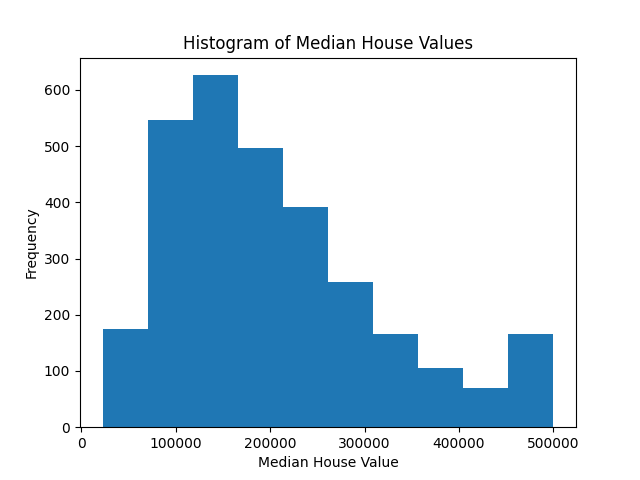

Output Files: 

File Name: median_house_values.csv



In [ ]:
res = parse_output_files(response["output_files"])

In [ ]:
def convert_csv_to_hist(res):
  """Converts CSV-formatted data into a histogram-compatible data structure.

  This function takes a CSV string containing median value and count information
  and transforms it into a list suitable for generating a histogram plot.

  Args:
    res: A string containing CSV data. The first line is assumed to contain
         column headers, with subsequent lines containing median value and count
         pairs separated by a comma.

  Returns:
    A list where the first element contains the original CSV header information.
    Subsequent elements are lists with two values: [bin_center, bin_count],
    representing the center of each histogram bin and the corresponding count of
    data points within that bin.
  """
  hist_data=[]
  res_arr = res.split('\n')
  for arr in res_arr[1:]:
    median_val_count = arr.split(',')
    if not '' in median_val_count:
      median_val_count_float = [float(i) for i in median_val_count]
      hist_data.append(median_val_count_float)
  hist_data_sorted = sorted(hist_data,key=lambda x: x[0])
  hist_data_sorted_np=np.array(hist_data_sorted)

  # convert np array to bar chart data
  hist_data_final=[]
  bin_len = int(len(hist_data_sorted)/9)
  for i in range(0,len(hist_data_sorted),bin_len):
    temp_arr = hist_data_sorted_np[i:i+bin_len-1,:]
    bin_center = np.mean(temp_arr[:, 0])
    bin_count = np.sum(temp_arr[:, 1])
    hist_data_final.append([int(bin_center),int(bin_count)])
  hist_data_final.insert(0,res_arr[0].split(','))
  return hist_data_final

In [ ]:
hist_data_final = convert_csv_to_hist(res)
hist_data_final

[['median_house_value', 'count'],
 [65344, 288],
 [98957, 403],
 [131601, 380],
 [161468, 400],
 [190727, 310],
 [224597, 317],
 [262999, 283],
 [316138, 255],
 [405905, 224],
 [500000, 129]]

Debugging Tip: if median_house_value_counts.csv is not returned from parse_output_files function (a few cells above), this `convert_csv_to_hist` function will fail. To temporarily bypass the failure, you can set `hist_data_final` to the data below. You can continue running the rest of the notebook this way. Later, you can come back and try the prompt above again or modify the prompt to get the median_house_value_counts.csv.



In [ ]:
# Uncomment it and run it if needed
# hist_data_final=
# [['median_house_value', 'count'],
#  [65344, 288],
#  [98957, 403],
#  [131601, 380],
#  [161468, 400],
#  [190727, 310],
#  [224597, 317],
#  [262999, 283],
#  [316138, 255],
#  [405905, 224],
#  [500000, 129]]

### Step 3: Use the Vertex AI Search Extension to Research on Housing Opportunities

For using the Vertex AI Search Extension, please grant the [Vertex AI Extension Service agent](https://cloud.google.com/vertex-ai/docs/general/access-control#service-agents) the [permission needed](https://cloud.google.com/vertex-ai/docs/general/access-control#home-project). In this case, you need permissions to run discovery engine.

To do so in the UI:
1. Go to https://console.cloud.google.com/iam-admin/iam
2. Make sure you're in the right project.
3. Enable the checkfield `Include Google-provided role grants`. This will show you the active service accounts in your project.
4. Locate the service agent with the name **Vertex AI Extension Service Agent**.
5. Click on the pen icon to edit the roles for this service agent.
6. Click on `add another role` and add **Discovery Engine Editor**.
7. Save the changes.


**Alternatively, run the next cell to assign the role to the Service Agent programmatically:**

In [ ]:
%%bash -s "$PROJECT_ID"

# Get project number using gcloud
PROJECT_NUMBER=$(gcloud projects describe $1 --format="value(projectNumber)")

# Service agent email
SERVICE_AGENT_EMAIL="service-$PROJECT_NUMBER@gcp-sa-vertex-ex.iam.gserviceaccount.com"

# Role to add
ROLE="roles/discoveryengine.editor"

# Add the role using gcloud CLI (with the correct service agent email)
gcloud projects add-iam-policy-binding $1 \
    --member="serviceAccount:$SERVICE_AGENT_EMAIL" \
    --role=$ROLE

#### Create Search Engine for Search Extension in 4 Steps

To create a search engine for Vertex AI Search Extension to use, you can either do that manually by following [those docs](https://cloud.google.com/generative-ai-app-builder/docs/create-datastore-ingest) or run the 4 steps below.

##### 1. Download PDFs and Ingest into GCS Bucket

We want the Vertex AI Search extension to summarize the contents for us and to answer our questions. To do this, we could manually grab the above PDFs and set up a data store for websites in the Google Cloud Console.

But, we want to ensure cleaner results. For this reason, first fetch the PDFs contents from the websites, then store the .pdf files in your Google Cloud Storage Bucket.
Those are the 4 PDFs we use in the search engine: [PDF1](https://sgp.fas.org/crs/misc/R47617.pdf), [PDF2](https://sgp.fas.org/crs/misc/IF11327.pdf), [PDF3](https://www.whitehouse.gov/wp-content/uploads/2024/03/ERP-2024-CHAPTER-4.pdf), [PDF4](https://ahcd.assembly.ca.gov/sites/ahcd.assembly.ca.gov/files/HCD%20_SHA_Presentation.pdf)

The following cell lets you download the PDFs from the websites and write them into .pdf files. Then, these files will be uploaded to your GCS bucket.

In [ ]:
from google.cloud import storage

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    generation_match_precondition = None
    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)
    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

In [ ]:
import urllib.request
gcs_bucket = "your bucket name"
folder_path = "house_invest_pdfs/" #sub folder path

# list of pdfs that you want to ingest to the bucket
url_list = ["https://sgp.fas.org/crs/misc/R47617.pdf","https://sgp.fas.org/crs/misc/IF11327.pdf","https://www.whitehouse.gov/wp-content/uploads/2024/03/ERP-2024-CHAPTER-4.pdf","https://ahcd.assembly.ca.gov/sites/ahcd.assembly.ca.gov/files/HCD%20_SHA_Presentation.pdf"]
i=1
for url in url_list:
  urllib.request.urlretrieve(url, f"invest{i}.pdf")
  upload_blob(gcs_bucket,f"invest{i}.pdf",f"{folder_path}invest{i}.pdf")
  i+=1

File invest1.pdf uploaded to house_invest_pdfs/invest1.pdf.
File invest2.pdf uploaded to house_invest_pdfs/invest2.pdf.
File invest3.pdf uploaded to house_invest_pdfs/invest3.pdf.
File invest4.pdf uploaded to house_invest_pdfs/invest4.pdf.


##### 2. Create a Search Data Store

The Vertex AI Search extension needs a **Data Store** and **Vertex Search Engine** to run. [You can learn more about Data Stores and Vertex Search Engines here](https://cloud.google.com/generative-ai-app-builder/docs/create-datastore-ingest).

The following cells will help you in the setup.

In [ ]:
# @markdown Specify an id for your datastore. It should only use lowercase letters.
DATA_STORE_ID = "ba-workflow-extensions" # @param {type:"string"}

Use the following bash command to **create** your Data Store:

In [ ]:
%%bash -s "$PROJECT_ID" "$DATA_STORE_ID"

curl -X POST \
-H "Authorization: Bearer $(gcloud auth print-access-token)" \
-H "Content-Type: application/json" \
-H "X-Goog-User-Project: $1" \
"https://discoveryengine.googleapis.com/v1alpha/projects/$1/locations/global/collections/default_collection/dataStores?dataStoreId=$2" \
-d '{
  "displayName": "BA-Workflow-Extensions-Store",
  "industryVertical": "GENERIC",
  "solutionTypes": ["SOLUTION_TYPE_SEARCH"],
  "contentConfig": "CONTENT_REQUIRED",
}'

{
  "name": "projects/656421903914/locations/global/collections/default_collection/operations/create-data-store-12708654319533099836",
  "done": true,
  "response": {
    "@type": "type.googleapis.com/google.cloud.discoveryengine.v1alpha.DataStore",
    "name": "projects/656421903914/locations/global/collections/default_collection/dataStores/ba-workflow-extensions",
    "displayName": "BA-Workflow-Extensions-Store",
    "industryVertical": "GENERIC",
    "solutionTypes": [
      "SOLUTION_TYPE_SEARCH"
    ],
    "contentConfig": "CONTENT_REQUIRED",
    "defaultSchemaId": "default_schema"
  }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   770    0   601  100   169    595    167  0:00:01  0:00:01 --:--:--   763


🎉 Your Data Store is all set! You can inspect it under: https://console.cloud.google.com/gen-app-builder/data-stores

Now you just need to **ingest** your .pdf files with the website contents into it by running the cell below.

**This process can take somewhere between 5-10 mins.** You can check the status of the ingestion by following the link above and clicking on your newly created Data Store.

##### 3. Ingest PDF Files into Datastore

In [ ]:
from typing import Optional

from google.api_core.client_options import ClientOptions
from google.cloud import discoveryengine

def import_documents_sample(
    project_id: str,
    location: str,
    data_store_id: str,
    gcs_uri: Optional[str] = None,
    bigquery_dataset: Optional[str] = None,
    bigquery_table: Optional[str] = None,
) -> str:
    """Imports documents into a Vertex AI data store from GCS or BigQuery.

    This function imports documents into a specified data store within Vertex AI Agent Builder,
    either from a GCS bucket or a BigQuery table. It uses the incremental reconciliation
    mode, which adds new documents and updates existing ones.

    Args:
        project_id: The ID of the Google Cloud project.
        location: The region where the data store is located (e.g., "us-central1").
            For multi-region data stores, use the format "region1-region2".
            Use "global" for global data stores.
        data_store_id: The ID of the data store.
        gcs_uri: The GCS URI of the documents to import (e.g., "gs://my-bucket/docs/*.pdf").
            This argument is mutually exclusive with `bigquery_dataset` and `bigquery_table`.
        bigquery_dataset: The BigQuery dataset containing the documents to import.
            This argument is mutually exclusive with `gcs_uri`.
        bigquery_table: The BigQuery table containing the documents to import.
            This argument is mutually exclusive with `gcs_uri`.

    Returns:
        str: The name of the long-running operation that imports the documents.

    Raises:
        ValueError: If both `gcs_uri` and `bigquery_dataset`/`bigquery_table` are provided,
            or if none of them are provided.
        google.api_core.exceptions.GoogleAPICallError: If the API call fails.

    """
    #  For more information, refer to:
    # https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )

    # Create a client
    client = discoveryengine.DocumentServiceClient(client_options=client_options)

    # The full resource name of the search engine branch.
    # e.g. projects/{project}/locations/{location}/dataStores/{data_store_id}/branches/{branch}
    parent = client.branch_path(
        project=project_id,
        location=location,
        data_store=data_store_id,
        branch="default_branch",
    )

    request = discoveryengine.ImportDocumentsRequest(
        parent=parent,
        gcs_source=discoveryengine.GcsSource(
            input_uris=[gcs_uri], data_schema="content"
        ),
        # Options: `FULL`, `INCREMENTAL`
        reconciliation_mode=discoveryengine.ImportDocumentsRequest.ReconciliationMode.INCREMENTAL,
    )


    # Make the request
    operation = client.import_documents(request=request)

    print(f"Waiting for operation to complete: {operation.operation.name}")
    response = operation.result()

    # Once the operation is complete,
    # get information from operation metadata
    metadata = discoveryengine.ImportDocumentsMetadata(operation.metadata)

    # Handle the response
    print(response)
    print(metadata)

    return operation.operation.name

In [ ]:
GCS_URI = f"gs://{gcs_bucket}/{folder_path}*.pdf"
import_documents_sample(PROJECT_ID, "global", DATA_STORE_ID, GCS_URI)

##### 4. Create a Vertex Search Engine and Connect it to the Data Store Above

The following cell let's you create a Vertex AI Search Engine on top of your newly created Data Store. For the Vertex AI Search Extension to work, you will need to enable Enterprise features by setting `"searchTier": "SEARCH_TIER_ENTERPRISE" `and Advanced LLM Features by setting `"searchAddOns": ["SEARCH_ADD_ON_LLM"]`.

**These settings will be set automatically by running the cell below.**






In [ ]:
%%bash -s "$PROJECT_ID" "$DATA_STORE_ID"

curl -X POST \
-H "Authorization: Bearer $(gcloud auth print-access-token)" \
-H "Content-Type: application/json" \
-H "X-Goog-User-Project: $1" \
"https://discoveryengine.googleapis.com/v1/projects/$1/locations/global/collections/default_collection/engines?engineId=$2" \
-d '{
  "displayName": "BA-Workflow-Extension-Engine",
  "dataStoreIds": ["'$2'"],
  "solutionType": "SOLUTION_TYPE_SEARCH",
  "searchEngineConfig": {
     "searchTier": "SEARCH_TIER_ENTERPRISE",
     "searchAddOns": ["SEARCH_ADD_ON_LLM"]
   }
}'

Once you create the search engine, use the search engine id in the vertex ai extension notebok. You can find it in [the search engine UI](https://console.cloud.google.com/gen-app-builder/engines).

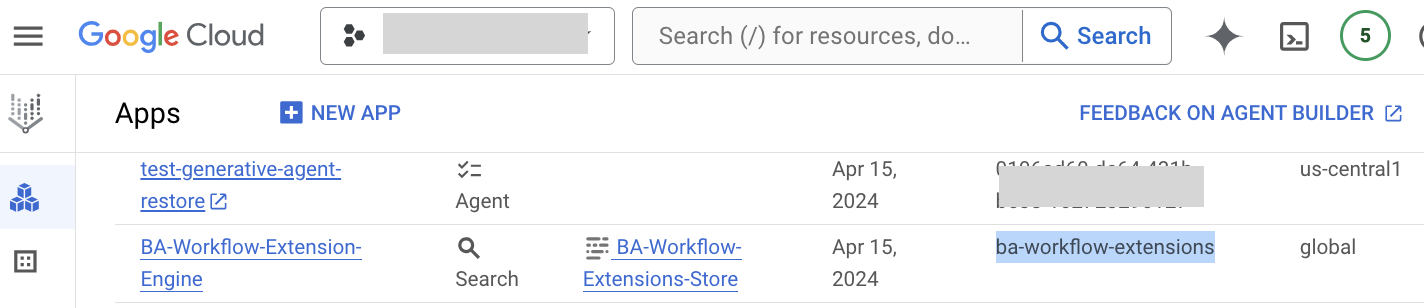

#### Set Up the Vertex AI Search Extension and Extracted Answers

In [ ]:
SEARCH_ENGINE_ID = "your search engine id"  # @param {type:"string"} Replace this with your search engine ID from Vertex AI Search
SEARCH_ENGINE_REGION = "your search engine region"  # @param {type:"string"} Replace this with the region that your search engine is located in

SEARCH_CONFIG  = "projects/{project_id}/locations/{search_engine_region}/collections/default_collection/engines/{search_engine_id}/servingConfigs/default_search".format(
    project_id=PROJECT_ID,
    search_engine_region=SEARCH_ENGINE_REGION,
    search_engine_id=SEARCH_ENGINE_ID)

In [ ]:
extension_vertex_ai_search = extensions.Extension.from_hub(
    "vertex_ai_search",
    runtime_config={
        "vertex_ai_search_runtime_config": {
            "serving_config_name": SEARCH_CONFIG,
        }
    })

extension_vertex_ai_search

INFO:vertexai.extensions._extensions:Creating Extension
INFO:vertexai.extensions._extensions:Create Extension backing LRO: projects/333698871702/locations/us-central1/extensions/7019352600466161664/operations/8109380974812332032
INFO:vertexai.extensions._extensions:Extension created. Resource name: projects/333698871702/locations/us-central1/extensions/7019352600466161664
INFO:vertexai.extensions._extensions:To use this Extension in another session:
INFO:vertexai.extensions._extensions:extension = vertexai.preview.extensions.Extension('projects/333698871702/locations/us-central1/extensions/7019352600466161664')


resource name: projects/333698871702/locations/us-central1/extensions/7019352600466161664

In [ ]:
QUERY = "Summarize investment opportunities in housing market in 4 bullet points" # @param {type:"string"}

In [ ]:
vertex_ai_search_response = extension_vertex_ai_search.execute(
    operation_id = "search",
    operation_params = {"query": QUERY},
)

We use extractive_answers from the response because extractive answers can be used as an alternative to summarized responses in cases where precise, verbatim answers are preferable to rephrased summaries. You can read [more here](https://cloud.google.com/generative-ai-app-builder/docs/snippets#extractive-answers).

In [ ]:
list_extractive_answers=[]
for i in vertex_ai_search_response:
    list_extractive_answers.append(i["extractive_answers"][0])
    print(i["extractive_answers"][0])

An increase in housing value encourages homeowners to spend more than they do at other times for a variety of reasons, including higher confidence in the economy, increased home equity for homeowners to borrow against, and higher rental income. A decrease in prices results in the opposite.
A few key points are summarized below. • When accounting for population, the housing stock (total number of housing units) remained largely unchanged between 1980 and 2022. • Across rental and owner-occupied markets, vacancy rates have decreased since the housing market crash and financial crisis of 2007-2009.
Historically, interest rates have fluctuated between 4 and 8 percent. Equity, mostly from private investors, fills the gap between debt and project costs. Housing development equity is a relatively risky investment class due to the time required for projects to generate rev enue.
Developing in high cost areas to ease demand vs. lower cost-per-unit investments in other markets The state&#39;s ur

#### Summarize Extracted Answers to Bullet Points

In [ ]:
model = GenerativeModel(model_name="gemini-1.0-pro")
summary_response = model.generate_content(f"{QUERY} from the content below: {list_extractive_answers}")

In [ ]:
def to_bullet_points(text):
  text = text.replace('**','')
  text = text.replace('* ','• ')
  text = text.replace('\n','\n\n')
  return text

In [ ]:
deck_text = to_bullet_points(summary_response.text)
deck_text

'• Rising housing values: Encourage homeowner spending and potential for appreciation.\n\n• Decreasing housing stock: Limited supply can lead to increased demand and higher prices.\n\n• Low vacancy rates: Indicate strong rental demand, creating opportunities for investors in rental properties.\n\n• Development in high-cost areas: High demand in urban areas can support premium investment opportunities despite higher development costs.'

### Step 4: Add Data Analysis and Research to the Slide Deck

#### Update the Histogram Chart with the Housing Value Data

In order to insert a bar chart to the deck later, we want to generate the bar chart in a sheet first. This function below updates a specified range of cells within a Google Sheet with new values provided as input. After the cells get updated, the bar chart in the sheet will get automatically updated.

You can learn more about [Google Sheet API here](https://developers.google.com/sheets/api/guides/concepts).



In [ ]:
SLIDE_DECK_ID = "your slide deck id"  # Replace this with your slide deck id
SHEET_ID = "your sheet id" # Replace this with your sheet id
SLIDE_PAGE1_ID = "page 1 id of your slide deck" # Replace this with page 1 id of the slide deck
SLIDE_PAGE2_ID = "page 2 id of your slide deck" # Replace this with page 1 id of the slide deck
def update_values(spreadsheet_id, range_name, value_input_option, values,creds):
  """Updates a range of cells in a Google Sheet with new values.

  Args:
    spreadsheet_id: The ID of the Google Sheet to update.
    range_name: The range of cells to update, in A1 notation (e.g., "A1:B11").
    value_input_option: Determines how the input values should be interpreted.
      Valid options include "USER_ENTERED".
    values: A list of lists representing the values to be written. The structure
      should match the desired range.
    creds: Credentials object authorizing access to the Google Sheets API.

  Returns:
    A dictionary containing information about the updated cells, or an HttpError object
    in case of an error.

  Raises:
    HttpError: If an error occurs during the Sheets API call.
  """
  try:
    service = build("sheets", "v4", credentials=creds)
    body = {"values": values}
    result = (
        service.spreadsheets()
        .values()
        .update(
            spreadsheetId=spreadsheet_id,
            range=range_name,
            valueInputOption=value_input_option,
            body=body,
        )
        .execute()
    )
    print(f"{result.get('updatedCells')} cells updated.")
    return result
  except HttpError as error:
    print(f"An error occurred: {error}")
    return error

# Add data into the sheet to update the chart
update_values(
      SHEET_ID,
      "A1:B11",
      "USER_ENTERED",
      hist_data_final,creds
  )

22 cells updated.


{'spreadsheetId': '19R9eaKpc0VGZkuyCfbqrfXPWjv_dl4kn6go-W2VXXPY',
 'updatedRange': 'Sheet1!A1:B11',
 'updatedRows': 11,
 'updatedColumns': 2,
 'updatedCells': 22}

#### Add the Histogram Chart to the Slide Template

This function below takes a bar chart from a Google Sheet and inserts it into a specified slide within a Google Slides presentation. The function maintains a live link between the sheet and the presentation, ensuring that any changes made in the sheet data automatically reflect in the presentation chart.

You can learn more about [Google Slide API here](https://developers.google.com/slides/api/reference/rest).

In [ ]:
def get_chart_id(
        spreadsheet_id,creds):
    """Retrieves a list of chart IDs from a Google Sheet.

    Args:
        spreadsheet_id: The ID of the Google Spreadsheet.
        creds: Credentials object for authorizing API requests.

    Returns:
        A list of chart IDs found within the specified spreadsheet.
    """
    spreadsheet_id = spreadsheet_id
    ranges = []
    include_grid_data = False

    service = build("sheets", "v4", credentials=creds)
    request = service.spreadsheets().get(
        spreadsheetId=spreadsheet_id,
        ranges=ranges,
        includeGridData=include_grid_data)
    response = request.execute()

    chart_id_list = []
    for chart in response['sheets'][0]['charts']:
        chart_id_list.append(chart['chartId'])
    return chart_id_list

In [ ]:
def add_chart_to_slides(
        presentation_id,
        spreadsheet_id,page_id,creds):
    """
    Adds a chart from a Google Sheet to a Google Slides presentation.

    Args:
        presentation_id (str): The ID of the Google Slides presentation.
        spreadsheet_id (str): The ID of the Google Sheet containing the chart.
        page_id (str): The ID of the slide page to insert the chart into.
        creds: Credentials object for authenticating with the Google Slides API.

    Returns:
        None

    Notes:
        * The first chart in the specified Google Sheet will be added to the presentation.
        * The chart will be linked to the spreadsheet, so changes in the sheet will update the chart in the presentation.
        * The `emu4m` variable defines the default size and position of the chart.
          Modify these values to customize the chart's appearance.
    """
    emu4m = {
        'magnitude': 4000000,
        'unit': 'EMU'
    }

    sheet_chart_id_list = get_chart_id(
        spreadsheet_id,creds)

    presentation_chart_id = str(uuid.uuid4())
    requests = [
            {
        'createSheetsChart': {
            'objectId': presentation_chart_id,
            'spreadsheetId': spreadsheet_id,
            'chartId': sheet_chart_id_list[0],
            'linkingMode': 'LINKED',
            'elementProperties': {
                'pageObjectId': page_id,
                'size': {
                    'height': emu4m,
                    'width': emu4m
                },
                'transform': {
                    'scaleX': 1.5,
                    'scaleY': 1.5,
                    'translateX': 1000000,
                    'translateY': 100000,
                    'unit': 'EMU'
                }
            }
        }
        }
        ]

    body = {
        'requests': requests
    }
    service = build("slides", "v1", credentials=creds)
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()

add_chart_to_slides(SLIDE_DECK_ID, SHEET_ID,SLIDE_PAGE2_ID,creds)

#### Add Housing Research Summary from Vertex AI Search Extension to the Slide

This function below updates a Google Slides presentation by finding and replacing specific text within slides. It uses the Google Slides API to search for text based on provided criteria (e.g., case sensitivity) and replaces it with the specified replacement text across designated slide pages.

In [ ]:
def replace_text_in_slides(
        presentation_id,
        deck_text,creds):
  """
  Replaces occurrences of a specified string in a Google Slides presentation.

  Args:
    presentation_id: The ID of the Google Slides presentation to modify.
    deck_text: The replacement text to insert.
    creds: Valid Google credentials for accessing the Slides API.

  Raises:
    HttpError: If an error occurs while communicating with the Slides API.

  Usage:
    To use this function, you will need to replace the placeholders:
      * `SLIDE_DECK_ID`:  Update with the actual presentation ID.
      * `SLIDE_PAGE1_ID`: Provide the Object ID of the specific slide page where the text replacement should occur. You can find this ID in the Slides UI. Multiple page IDs can be provided in the list to search multiple pages.
      * `deck_text`: Provide the text you want to replace.
  """
  try:
    service = build("slides", "v1", credentials=creds)
    presentation_id = SLIDE_DECK_ID # you need to use the presentation id of your slide

    requests = [
            {
          "replaceAllText": { # Replaces all instances of text matching a criteria with replace text. # Replaces all instances of specified text.
          "containsText": { # A criteria that matches a specific string of text in a shape or table. # Finds text in a shape matching this substring.
            "matchCase": True, # Indicates whether the search should respect case: - `True`: the search is case sensitive. - `False`: the search is case insensitive.
            "text": "{{replace_text}}", # The text to search for in the shape or table.
          },
          "pageObjectIds": [ # If non-empty, limits the matches to page elements only on the given pages. Returns a 400 bad request error if given the page object ID of a notes master, or if a page with that object ID doesn't exist in the presentation.
            SLIDE_PAGE1_ID,
          ],
          "replaceText": deck_text, # The text that will replace the matched text.
        }
            }
        ]

    body = {
        'requests': requests
    }
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()
  except HttpError as err:
    print(err)

replace_text_in_slides(SLIDE_DECK_ID,deck_text,creds)

### Step 5: Email Slide Links to Stakeholders

This function sends an email containing a link to a Google Slides presentation. It uses the Gmail API to authenticate with your Gmail account and then creates and sends an email message with the specified recipient, sender, subject, and presentation link.

You can learn more about [Gmail API here](https://developers.google.com/gmail/api/guides).



In [ ]:
def send_email(creds):
  """Sends an email with a link to a Google Slides presentation.

  Args:
    creds: Credentials object used for authentication with the Gmail API.

  Returns:
    None: If an error occurs during email sending.
    dict: A dictionary containing the message ID if the email is sent successfully.

  Raises:
    HttpError: If an HTTP error occurs during communication with the Gmail API.
  """
  try:
    # create gmail api client
    service_gmail = build("gmail", "v1", credentials=creds)

    message = EmailMessage()
    # send the slide to the stakeholders
    message.set_content(f"Check out the latest report on housing trend: https://docs.google.com/presentation/d/{SLIDE_DECK_ID}")

    message["To"] = "your stakeholder email address" # replace this with the message to email address
    message["From"] = "your email address" # replace this with the message from email address
    message["Subject"] = "Housing Opportunities Analysis"

    # encoded message
    encoded_message = base64.urlsafe_b64encode(message.as_bytes()).decode()

    create_message = {"raw": encoded_message}
    send_message = (
        service_gmail.users()
        .messages()
        .send(userId="me", body=create_message)
        .execute()
    )
    print(f'Message Id: {send_message["id"]}')
  except HttpError as error:
    print(f"An error occurred: {error}")
    send_message = None

send_email(creds)

Message Id: 18ec45f70bf82a85


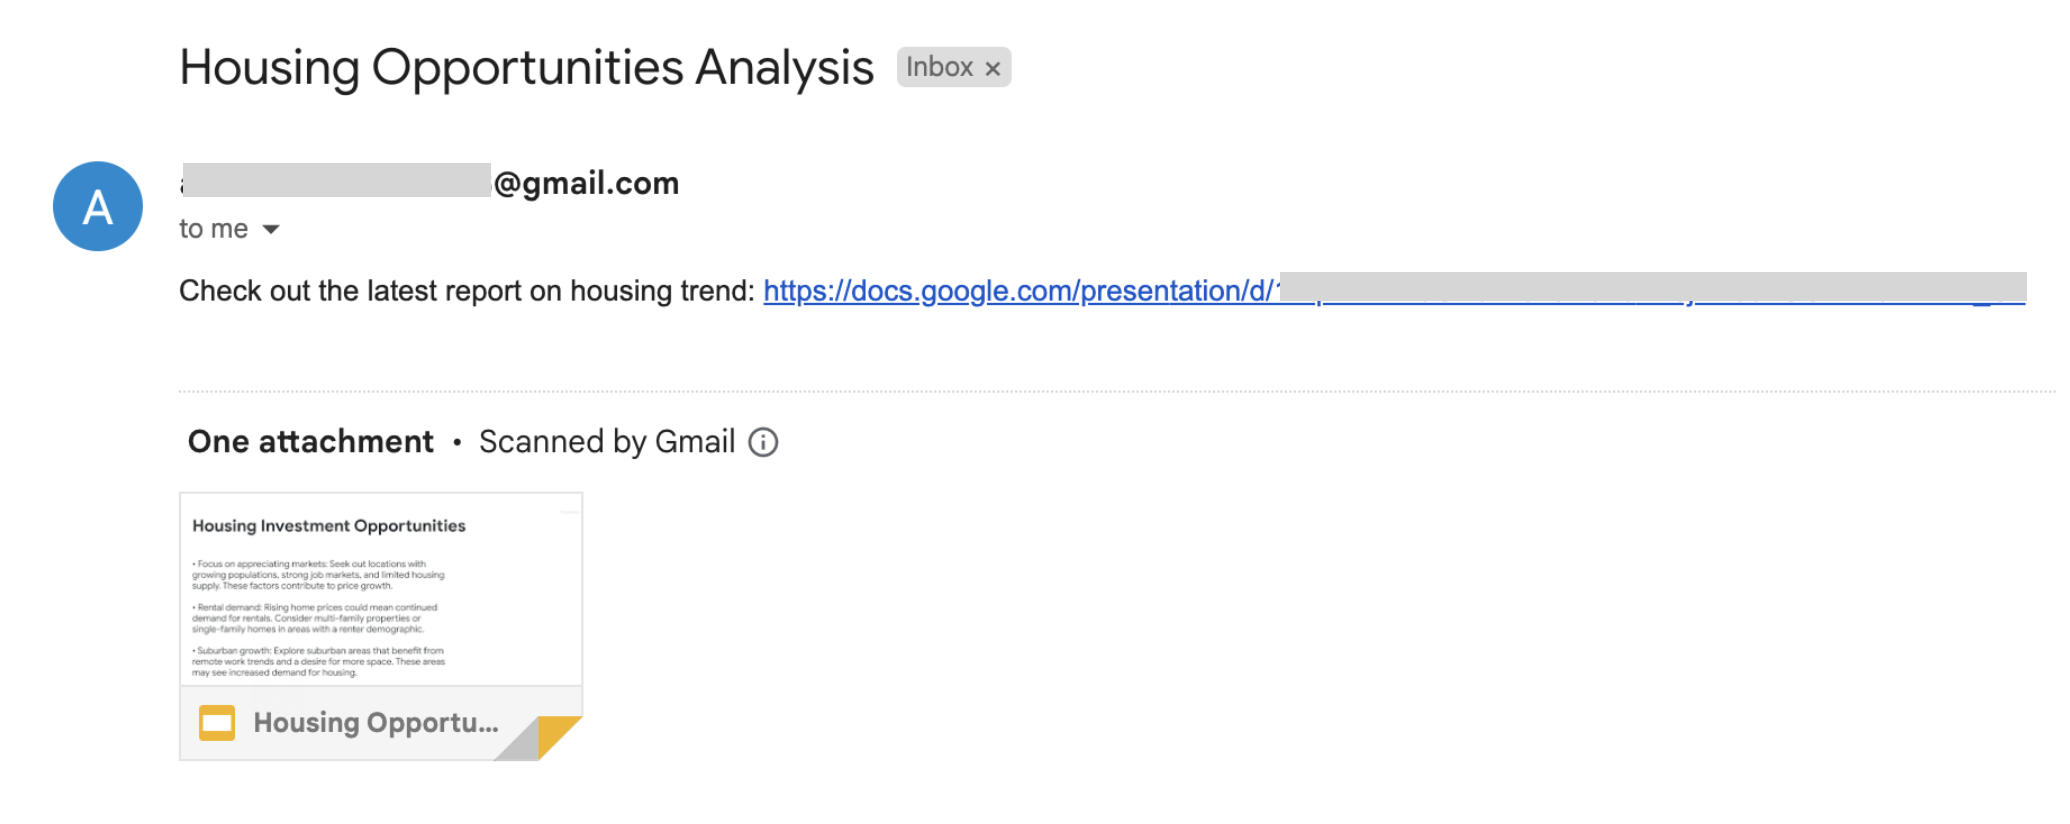

## Cleaning up

Clean up extension resources created in this notebook.

In [ ]:
extension_code_interpreter.delete()
extension_vertex_ai_search.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/7053129597671440384
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/1050067723746279424
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/7053129597671440384
INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/1288522074637205504
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/1721667018177904640
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/1288522074637205504


Don't forget to delete any created assets if you don't need them, e.g.


*   Files in your Colab Environment
*   PDFs in your GCS bucket and the bucket
*   Your Vertex Search Engine: https://console.cloud.google.com/gen-app-builder/apps
*   Your Data Store: https://console.cloud.google.com/gen-app-builder/data-stores
